In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


### 데이터 불러오기

In [10]:
# seed 값 설정 정닶값 재현 가능하도록
seed = 20
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력

df = pd.read_csv('../dataset/IRIS.csv')
df.columns=df.columns.str.lower()
df.head()

print(df["species"].drop_duplicates())

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object


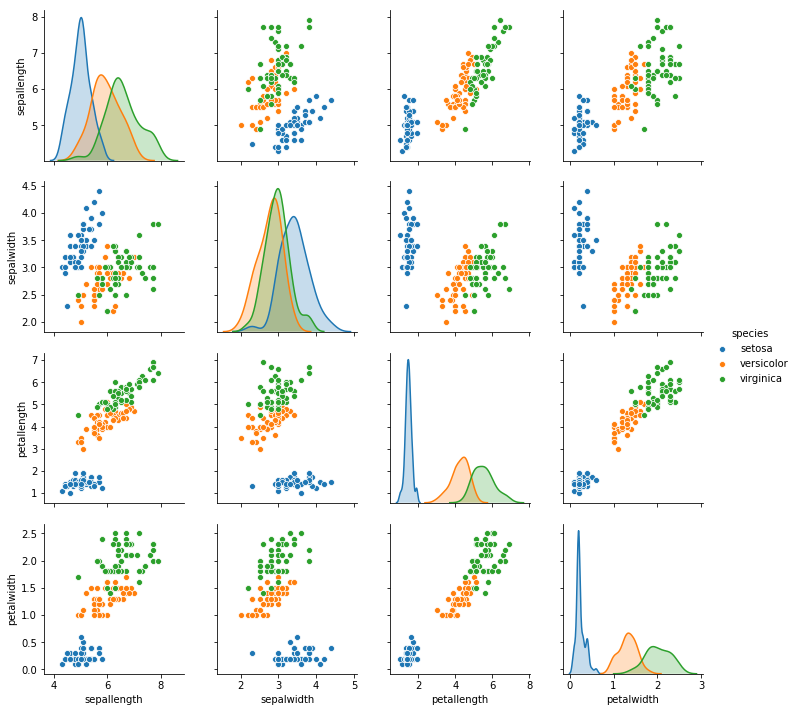

In [3]:
# 그래프로 확인

sns.pairplot(df, hue='species');
plt.show()


In [4]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:


model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [7]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=20)
#train model
hist = model.fit(X_train, y_train, 
                 epochs=80, 
                 validation_split=0.2, callbacks=[early_stopping_monitor])

Instructions for updating:
Use tf.cast instead.
Train on 96 samples, validate on 24 samples
Epoch 1/80
96/96 [==============================] - 0s 2ms/step - loss: 1.0780 - acc: 0.2708 - val_loss: 1.0019 - val_acc: 0.2500
Epoch 2/80
96/96 [==============================] - 0s 52us/step - loss: 0.9719 - acc: 0.3958 - val_loss: 1.0481 - val_acc: 0.2500
Epoch 3/80
96/96 [==============================] - 0s 77us/step - loss: 0.9104 - acc: 0.4792 - val_loss: 1.0522 - val_acc: 0.5417
Epoch 4/80
96/96 [==============================] - 0s 62us/step - loss: 0.8579 - acc: 0.7292 - val_loss: 0.9938 - val_acc: 0.5417
Epoch 5/80
96/96 [==============================] - 0s 62us/step - loss: 0.8107 - acc: 0.7292 - val_loss: 0.9205 - val_acc: 0.5417
Epoch 6/80
96/96 [==============================] - 0s 62us/step - loss: 0.7622 - acc: 0.7292 - val_loss: 0.8548 - val_acc: 0.5417
Epoch 7/80
96/96 [==============================] - 0s 67us/step - loss: 0.7202 - acc: 0.7292 - val_loss: 0.7973 - val_acc:

96/96 [==============================] - 0s 72us/step - loss: 0.1081 - acc: 0.9792 - val_loss: 0.1605 - val_acc: 0.9583
Epoch 61/80
96/96 [==============================] - 0s 62us/step - loss: 0.1069 - acc: 0.9792 - val_loss: 0.1582 - val_acc: 0.9583
Epoch 62/80
96/96 [==============================] - 0s 72us/step - loss: 0.1057 - acc: 0.9792 - val_loss: 0.1563 - val_acc: 0.9583
Epoch 63/80
96/96 [==============================] - 0s 67us/step - loss: 0.1046 - acc: 0.9792 - val_loss: 0.1538 - val_acc: 1.0000
Epoch 64/80
96/96 [==============================] - 0s 52us/step - loss: 0.1027 - acc: 0.9792 - val_loss: 0.1523 - val_acc: 1.0000
Epoch 65/80
96/96 [==============================] - 0s 57us/step - loss: 0.1001 - acc: 0.9792 - val_loss: 0.1515 - val_acc: 0.9583
Epoch 66/80
96/96 [==============================] - 0s 52us/step - loss: 0.0992 - acc: 0.9792 - val_loss: 0.1494 - val_acc: 1.0000
Epoch 67/80
96/96 [==============================] - 0s 72us/step - loss: 0.0978 - acc: 

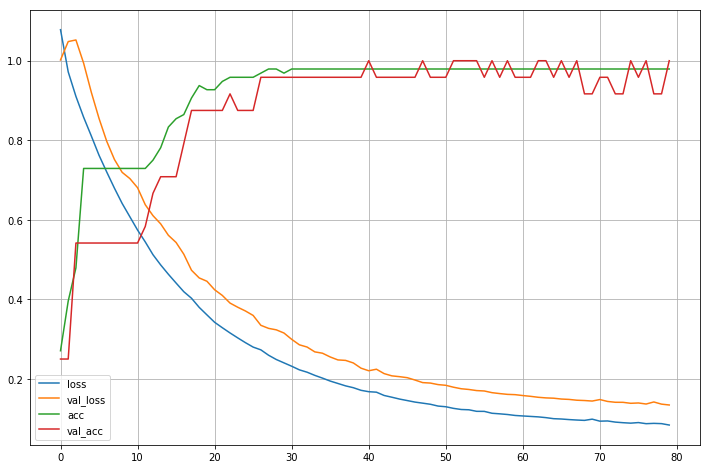

In [8]:

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 50us/step
Accuracy = 0.97


In [10]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

   micro avg       0.57      0.57      0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


C:\Users\kopo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 실습 customerData

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf



# seed 값 설정
seed = 21
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력

df = pd.read_csv('../dataset/customerdata.csv')
df.columns=df.columns.str.lower()
df.head()

# 그래프로 확인

sns.pairplot(df, hue='custtype');

plt.show()

from sklearn.preprocessing import LabelEncoder

X = df.iloc[:,1:5].values
y = df.iloc[:,5].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=700)
#train model
hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping_monitor])

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))